In [1]:
%reload_ext lab_black
from matplotlib import pyplot as plt
import numpy as np

In [2]:
extech330_meas = np.array(
    [0.499, 0.998, 1.497, 1.998, 2.507, 3.003, 3.496, 3.98, 4.50, 5.00, 5.50, 6.02]
)
tp325_readout = np.array(
    [0.490, 1.002, 1.492, 1.985, 2.502, 2.992, 3.486, 3.976, 4.471, 4.975, 5.484, 6.014]
)

In [3]:
@np.vectorize
def extech330_unc(meas):
    if meas < 0.400:
        return meas * 0.005 + 0.0002
    elif meas < 4:
        return meas * 0.01 + 0.002
    elif meas < 40:
        return meas * 0.01 + 0.02
    else:
        raise NotImplementedError("Voltages above 40V not implemented.")

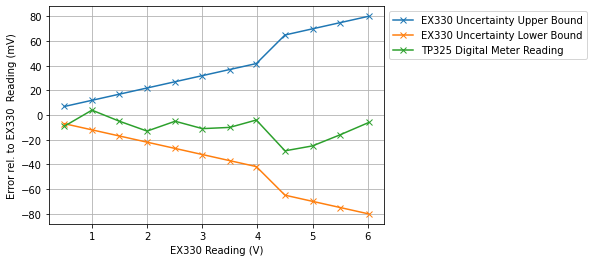

In [4]:
plt.plot(
    extech330_meas,
    extech330_unc(extech330_meas) * 1e3,
    "-x",
    label="EX330 Uncertainty Upper Bound",
)
plt.plot(
    extech330_meas,
    -extech330_unc(extech330_meas) * 1e3,
    "-x",
    label="EX330 Uncertainty Lower Bound",
)
plt.plot(
    extech330_meas,
    (tp325_readout - extech330_meas) * 1e3,
    "-x",
    label="TP325 Digital Meter Reading",
)

plt.xlabel("EX330 Reading (V)")
plt.ylabel("Error rel. to EX330  Reading (mV)")
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()